## <font size=5> <strong><center> Comparative Study of Predicting Coronary Heart Disease condition</center>
<center> <font size=5> <strong> using different Classification Algorithms

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [2]:
heart_df = pd.read_csv('./heart.csv')

In [3]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
heart_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
heart_df.shape

(1025, 14)

In [7]:
heart_df.sample(n=5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
129,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
727,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
764,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
516,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0
738,58,1,0,125,300,0,0,171,0,0.0,2,2,3,0


In [8]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Checking for Null values

In [9]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Understanding the dataset

In [10]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(heart_df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [11]:
#Renaming the column names
heart_df = heart_df.rename(columns = {'sex':'gender', 'trestbps':'rest_bp', 'fbs':'fasting_bs', 'restecg':'rest_ecg'})
heart_df

,age,gender,cp,rest_bp,chol,fasting_bs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Analyzing the features

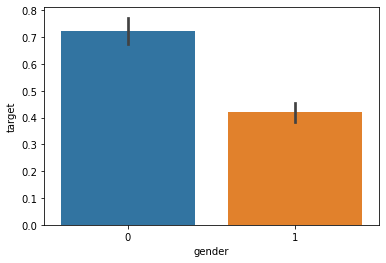

In [12]:
# gender
sns.barplot(x = heart_df['gender'], y = heart_df['target'])
plt.show()

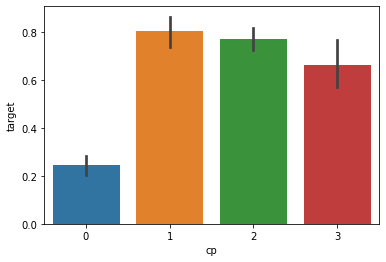

In [13]:
# cp
sns.barplot(x = heart_df['cp'], y = heart_df['target'])
plt.show()

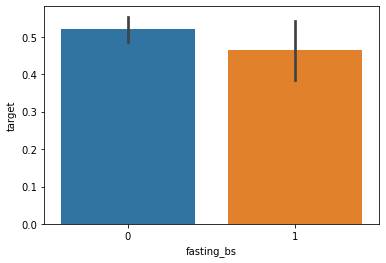

In [14]:
#fbs
sns.barplot(x = heart_df['fasting_bs'], y = heart_df['target'])
plt.show()

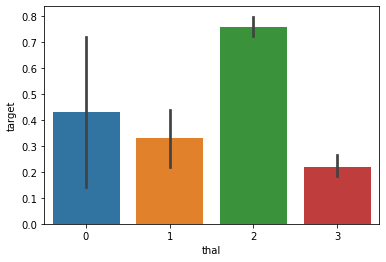

In [15]:
# thal
sns.barplot(x = heart_df['thal'], y = heart_df['target'])
plt.show()

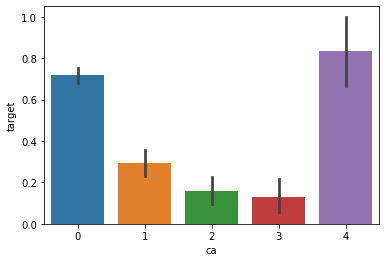

In [16]:
# ca
sns.barplot(x = heart_df['ca'], y = heart_df['target'])
plt.show()

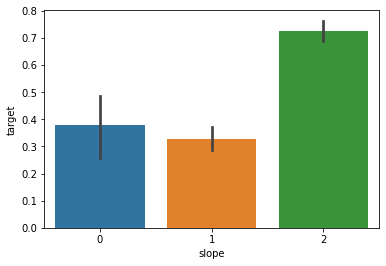

In [17]:
#slope
sns.barplot(x = heart_df['slope'], y = heart_df['target'])
plt.show()

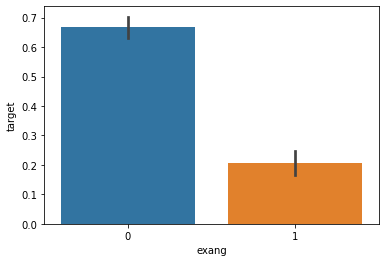

In [18]:
#exang
sns.barplot(x = heart_df['exang'], y = heart_df['target'])
plt.show()

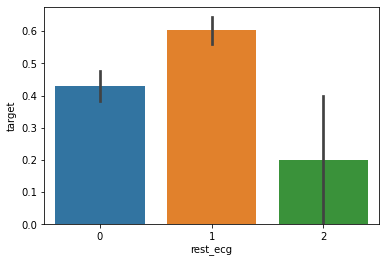

In [19]:
#rest_ecg
sns.barplot(x = heart_df['rest_ecg'], y = heart_df['target'])
plt.show()

In [20]:
heart_df['gender'].value_counts()

1    713
0    312
Name: gender, dtype: int64

In [ ]:
import statsmodels.

### Fitting and Finding the Best Model

In [21]:
# Train_Test_Split
from sklearn.model_selection import train_test_split

X = heart_df.drop("target",axis=1)
y = heart_df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.33,random_state= 0)

#### Logistic Regression

In [22]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
accuracy_score_lr = round(accuracy_score(Y_test,Y_pred_lr)*100,2)
print("Accuracy score achieved by Logistic regression is",accuracy_score_lr,"%")

Accuracy score achieved by Logistic regression is 87.02 %


In [24]:
#confusion matrix
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred_lr)
confusion_matrix_df = pd.DataFrame(data = confusion_matrix, columns = ['predict:No disease','predict:disease'], index=['true : No disease','true:disease'])
confusion_matrix_df

,predict:No disease,predict:disease
true : No disease,129,29
true:disease,15,166


In [25]:
true_positive = confusion_matrix[1,1]
true_negative = confusion_matrix[0,0]
false_positive = confusion_matrix[0,1]
false_negative = confusion_matrix[1,0]

In [26]:
#precision
precision_score_lr = true_positive/(true_positive + false_positive)
print("Precision score achieved by Logistic regression is",precision_score_lr)

Precision score achieved by Logistic regression is 0.8512820512820513


In [27]:
recall_score_lr = true_positive/(true_positive + false_negative)
print("Recall score achieved by Logistic regression is",recall_score_lr)

Recall score achieved by Logistic regression is 0.9171270718232044


#### Naive Bayes

In [28]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [29]:
accuracy_score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
print("Accuracy score achieved by Naive Bayes is",accuracy_score_nb,"%")

Accuracy score achieved by Naive Bayes is 84.37 %


In [30]:
from sklearn.metrics import precision_score, recall_score
precision_score_nb = precision_score(Y_pred_nb, Y_test, average='macro')
print("Precision score achieved by Naive Bayes is",precision_score_nb)

Precision score achieved by Naive Bayes is 0.8419295055598294


In [31]:
recall_score_nb = recall_score(Y_pred_nb, Y_test, average='macro')
print("Recall score achieved by Naive Bayes is",recall_score_nb)

Recall score achieved by Naive Bayes is 0.8436116382036686


#### K-Nearest Neighbors

In [32]:
#K-Nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [33]:
accuracy_score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("Accuracy score achieved by K-Nearest Neighbors is",accuracy_score_knn,"%")

Accuracy score achieved by K-Nearest Neighbors is 75.52 %


In [34]:
precision_score_knn = precision_score(Y_pred_nb, Y_test, average='macro')
print("Precision score achieved by K-Nearest Neighbors is",precision_score_knn)

Precision score achieved by K-Nearest Neighbors is 0.8419295055598294


In [35]:
recall_score_knn = recall_score(Y_pred_nb, Y_test, average='macro')
print("Recall score achieved by K-Nearest Neighbors is",recall_score_knn)

Recall score achieved by K-Nearest Neighbors is 0.8436116382036686


#### Support Vector Machine (SVM)

In [36]:
#SVM
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [37]:
accuracy_score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("Accuracy score achieved by Support Vector Machine(SVM) is",accuracy_score_svm,"%")

Accuracy score achieved by Support Vector Machine(SVM) is 86.73 %


In [38]:
precision_score_svm = precision_score(Y_pred_svm, Y_test, average='macro')
print("Precision score achieved by Support Vector Machine(SVM) is",precision_score_svm)

Precision score achieved by Support Vector Machine(SVM) is 0.8628225750052452


In [39]:
recall_score_svm = recall_score(Y_pred_svm, Y_test, average='macro')
print("Recall score achieved by Support Vector Machine(SVM) is",recall_score_svm)

Recall score achieved by Support Vector Machine(SVM) is 0.8732374100719424


#### Decision Tree

In [40]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [41]:
accuracy_score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
print("Accuracy score achieved by Decision Tree is",accuracy_score_dt,"%")

Accuracy score achieved by Decision Tree is 99.12 %


In [42]:
precision_score_dt = precision_score(Y_pred_dt, Y_test, average='macro')
print("Precision score achieved by Decision Tree is",precision_score_dt)

Precision score achieved by Decision Tree is 0.9917127071823204


In [43]:
recall_score_dt = recall_score(Y_pred_dt, Y_test, average='macro')
print("Recall score achieved by Decision Tree is",recall_score_dt)

Recall score achieved by Decision Tree is 0.9906832298136645


#### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier



rf = RandomForestClassifier(n_estimators =500,random_state=0)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [45]:
accuracy_score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
print("Accuracy score achieved by Random Forest is",accuracy_score_rf,"%")

Accuracy score achieved by Random Forest is 100.0 %


In [46]:
precision_score_rf = precision_score(Y_pred_rf, Y_test, average='macro')
print("Accuracy score achieved by Random Forest is",precision_score_rf)

Accuracy score achieved by Random Forest is 1.0


In [47]:
recall_score_rf = recall_score(Y_pred_dt, Y_test, average='macro')
print("Recall score achieved by Random Forest is",recall_score_rf)

Recall score achieved by Random Forest is 0.9906832298136645


In [48]:
scores = [accuracy_score_lr, accuracy_score_nb, accuracy_score_knn, accuracy_score_svm, accuracy_score_dt, accuracy_score_rf]
algorithms = ["Logistic Regression", "Naive Bayes", "K-Nearest Neighbors", "Support Vector Machine", "Decision Tree", "Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 87.02 %
The accuracy score achieved using Naive Bayes is: 84.37 %
The accuracy score achieved using K-Nearest Neighbors is: 75.52 %
The accuracy score achieved using Support Vector Machine is: 86.73 %
The accuracy score achieved using Decision Tree is: 99.12 %
The accuracy score achieved using Random Forest is: 100.0 %


-------------------------------------------------------------------------------------------------------------------------------

### Feature Importance using Random Forest Classifier

In [49]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(rf)
sel.fit(X_train,Y_train)
print(sel.get_support())
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

[ True False  True False  True False False  True False  True False  True
  True]


cp            0.131230
ca            0.120901
thalach       0.112115
oldpeak       0.103004
thal          0.102780
age           0.096939
chol          0.083880
rest_bp       0.072840
exang         0.061330
slope         0.045047
gender        0.038237
rest_ecg      0.020769
fasting_bs    0.010927
dtype: float64

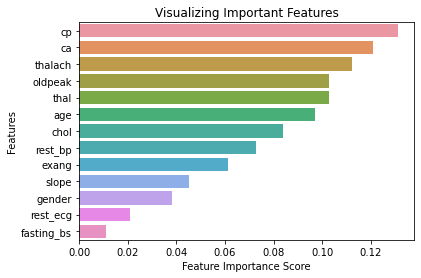

In [50]:
# Creating a seaborn bar plot of important features according to the imporatnce using Random Forest Classifier

sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

### 2. What are the best features for predicting heart disease?

### Using Univariate Selection

In [51]:
#  Univariate Selection
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = heart_df.iloc[:,0:13]  #independent columns
y = heart_df.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=2)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  ##print 10 best features

      Specs       Score
7   thalach  650.008493
9   oldpeak  253.653461
2        cp  217.823922
11       ca  210.625919
8     exang  130.470927
4      chol  110.723364
0       age   81.425368
3   rest_bp   45.974069
10    slope   33.673948
1    gender   24.373650


In [52]:
#generate a heat map for gender with all attributes and  observe the relation 

gen_male=heart_df[heart_df['gender']==1]

gen_female=heart_df[heart_df['gender']==0]


gen_male=gen_male.rename(columns={'gender':'male'})
gen_female=gen_female.rename(columns={'gender':'female'})

gen_male_tar=gen_male[gen_male['target']==1]

gen_female_tar=gen_female[gen_female['target']==0]

gen_male_tar


,age,male,cp,rest_bp,chol,fasting_bs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
19,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
22,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1
26,44,1,2,130,233,0,1,179,1,0.4,2,0,2,1
34,50,1,2,129,196,0,1,163,0,0.0,2,0,2,1
36,51,1,3,125,213,0,0,125,1,1.4,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
1008,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
1011,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1


#### Finding the most effecting features in Male according to importance

In [53]:
#  Univariate Selection
# Best features for female 
new_x= gen_male.iloc[:,0:13]  #independent columns
new_y= gen_male.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfea = SelectKBest(score_func=chi2, k=10)
fit = bestfea.fit(new_x,new_y)
dfscore = pd.DataFrame(fit.scores_)
dfcolumn = pd.DataFrame(new_x.columns)
#concat two dataframes for better visualization 
featureScore = pd.concat([dfcolumn,dfscore],axis=1)
featureScore.columns = ['Specs','Score']  #naming the dataframe columns
print('Best Features for male:\n\n',featureScore.nlargest(10,'Score'))  ##print 10 best features

Best Features for male:

        Specs       Score
7    thalach  648.848871
4       chol  187.388575
2         cp  144.756397
9    oldpeak  141.778575
11        ca  103.308144
0        age   91.191038
8      exang   68.016658
10     slope   19.736096
6   rest_ecg    9.378362
12      thal    8.215277


#### Finding the most effecting features in Female according to importance

In [54]:
#  Univariate Selection
# Best features for female 
new_x= gen_female.iloc[:,0:13]  #independent columns
new_y= gen_female.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfea = SelectKBest(score_func=chi2, k=10)
fit = bestfea.fit(new_x,new_y)
dfscore = pd.DataFrame(fit.scores_)
dfcolumn = pd.DataFrame(new_x.columns)
#concat two dataframes for better visualization 
featureScore = pd.concat([dfcolumn,dfscore],axis=1)
featureScore.columns = ['Specs','Score']  #naming the dataframe columns
print('Best Features for female:\n\n',featureScore.nlargest(8,'Score'))  ##print 10 best features

Best Features for female:

       Specs       Score
3   rest_bp  145.180021
9   oldpeak  117.694438
11       ca  110.206185
4      chol  105.985888
2        cp   81.659645
8     exang   59.310179
7   thalach   56.621378
0       age   21.888019


-------------------------------------------------------------------------------------------------------------------------------

### Splitting the data and Finding the best model after dropping the features

In [55]:
#Splitting the data using only 5 top features of Univariate Selection
X_add = heart_df[['thalach','oldpeak','ca','cp','exang']]
y_add = heart_df["target"]

X_train_1,X_test_1,Y_train_1,Y_test_1 = train_test_split(X_add,y_add,test_size=0.33,random_state= 0)


In [56]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_1,Y_train_1)

Y_pred_lr_1 = lr.predict(X_test_1)

#accuracy_score
accuracy_score_lr_new = round(accuracy_score(Y_test_1,Y_pred_lr_1)*100,2)
print("New accuracy score achieved by Logistic Regression is",accuracy_score_lr_new,"%")

New accuracy score achieved by Logistic Regression is 85.25 %


In [57]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train_1,Y_train_1)

Y_pred_nb_1 = nb.predict(X_test_1)

#accuracy_score
accuracy_score_nb_new = round(accuracy_score(Y_pred_nb_1,Y_test_1)*100,2)
print("New accuracy score achieved by Naive Bayes is",accuracy_score_nb_new,"%")

New accuracy score achieved by Naive Bayes is 81.12 %


In [58]:
#K-Nearest neighbors
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_1,Y_train_1)
Y_pred_knn_1=knn.predict(X_test_1)

#accuracy_score
accuracy_score_knn_new = round(accuracy_score(Y_pred_knn_1,Y_test_1)*100,2)
print("New accuracy score achieved by K-Nearest Neighbors is",accuracy_score_knn_new,"%")

New accuracy score achieved by K-Nearest Neighbors is 84.66 %


In [59]:
#SVM
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train_1, Y_train_1)

Y_pred_svm_1 = sv.predict(X_test_1)

#accuracy_score
accuracy_score_svm_new = round(accuracy_score(Y_pred_svm_1,Y_test_1)*100,2)
print("New accuracy score achieved by Support Vector Machine(SVM) is",accuracy_score_svm_new,"%")

New accuracy score achieved by Support Vector Machine(SVM) is 85.25 %


In [60]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train_1,Y_train_1)
Y_pred_dt_1 = dt.predict(X_test_1)

#accuracy_score
accuracy_score_dt_new = round(accuracy_score(Y_pred_dt_1,Y_test_1)*100,2)
print("New accuracy score achieved by Decision Tree is",accuracy_score_dt_new,"%")

New accuracy score achieved by Decision Tree is 97.64 %


In [61]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators =500,random_state=0)
rf.fit(X_train_1,Y_train_1)
Y_pred_rf_1 = rf.predict(X_test_1)

#accuracy_score
accuracy_score_rf_new = round(accuracy_score(Y_pred_rf_1,Y_test_1)*100,2)
print("New accuracy score achieved by Random Forest is",accuracy_score_rf_new,"%")

New accuracy score achieved by Random Forest is 97.64 %


In [62]:
scores_new = [accuracy_score_lr_new, accuracy_score_nb_new, accuracy_score_knn_new, accuracy_score_svm_new, accuracy_score_dt_new, accuracy_score_rf_new]
algorithms = ["Logistic Regression", "Naive Bayes", "K-Nearest Neighbors", "Support Vector Machine", "Decision Tree", "Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores_new[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 81.12 %
The accuracy score achieved using K-Nearest Neighbors is: 84.66 %
The accuracy score achieved using Support Vector Machine is: 85.25 %
The accuracy score achieved using Decision Tree is: 97.64 %
The accuracy score achieved using Random Forest is: 97.64 %


In [63]:
# corr = gen_male.corr()
# top_corr_fea = corr.index
# plt.figure(figsize=(10,10))
# #plot heat map
# g=sns.heatmap(gen_male[top_corr_fea].corr(),annot=True,cmap="RdYlGn")


-------------------------------------------------------------------------------------------------------------------------------

### Data Visualization

[0.06912242 0.05817316 0.11669626 0.06052303 0.06073996 0.02121871
 0.03571301 0.09374877 0.10121172 0.08413422 0.07566525 0.13207444
 0.09097904]


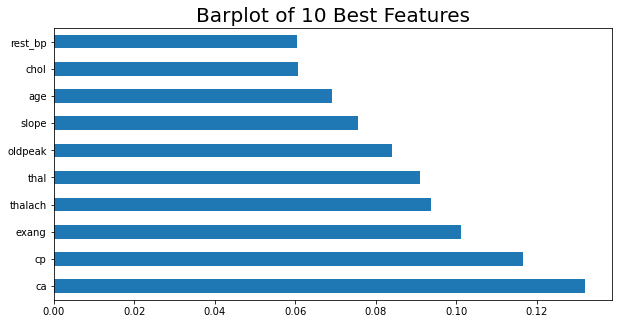

In [64]:
import pandas as pd
import numpy as np
X = heart_df.iloc[:,0:13]  #independent columns
y = heart_df.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
plt.figure(figsize=(10,5))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Barplot of 10 Best Features', size= 20)
plt.show()

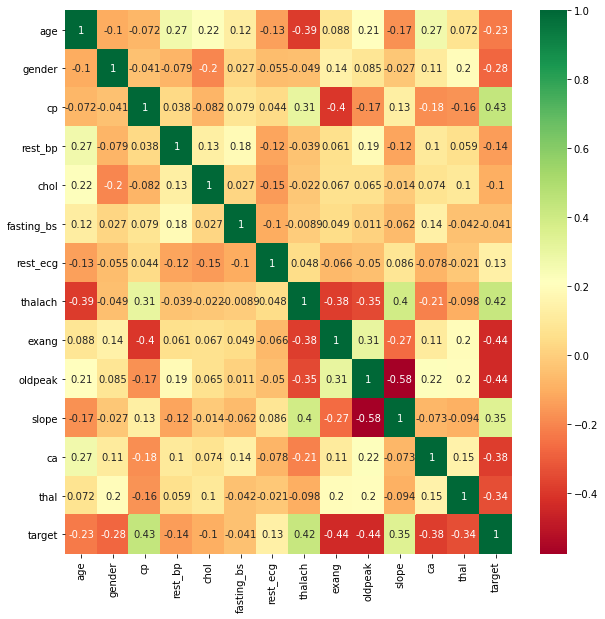

In [65]:
#Heat map for top correlation features
import pandas as pd
import numpy as np
import seaborn as sns
X = heart_df.iloc[:,0:13]  #independent columns
y = heart_df.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = heart_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(heart_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

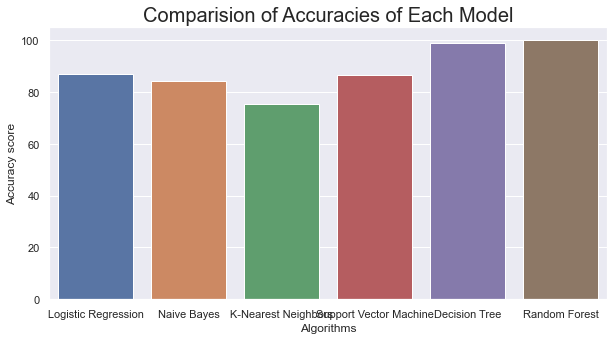

In [66]:
#Comparision of Accuracies of each model before dropping the features
sns.set(rc={'figure.figsize':(10,5)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x= algorithms,y =scores)
plt.title('Comparision of Accuracies of Each Model', size = 20)
plt.show()

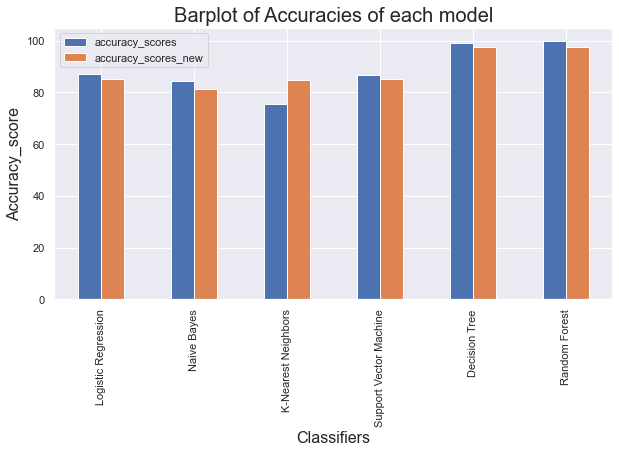

In [67]:
#Barplot of accuracies of each model before and after dropping the features
accuracy_scores = [accuracy_score_lr, accuracy_score_nb, accuracy_score_knn, accuracy_score_svm, accuracy_score_dt, accuracy_score_rf]
accuracy_scores_new = [accuracy_score_lr_new, accuracy_score_nb_new, accuracy_score_knn_new, accuracy_score_svm_new, accuracy_score_dt_new, accuracy_score_rf_new]
index = ['Logistic Regression','Naive Bayes', 'K-Nearest Neighbors', 'Support Vector Machine', 'Decision Tree', 'Random Forest']
accuracies_df = pd.DataFrame({'accuracy_scores':accuracy_scores,
                             'accuracy_scores_new':accuracy_scores_new}, index=index)
y = np.random.randint(low=0, high=100, size=10)
#plt.figure(figsize=(10,10))
accuracies_df.plot.bar()
plt.xlabel('Classifiers', size = 16)
plt.ylabel('Accuracy_score', size = 16)
plt.title('Barplot of Accuracies of each model', size= 20)
plt.show()

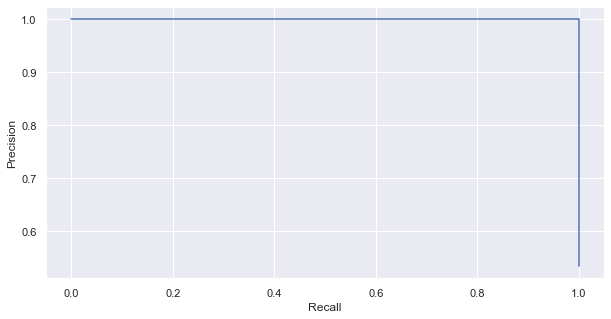

In [68]:
#Precision-recall curve
# from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)

# precision, recall, _ = precision_recall_curve(Y_test, Y_pred_rf)
# disp = PrecisionRecallDisplay(precision=precision, recall=recall)
# plt.show()
# disp.plot()

# plt.show()

--------------------------------------------------------------------------------------------------------------------------

### 3. What is the average age of getting CAD in both males and females?

In [69]:
target_new = heart_df[heart_df['target']==1]
target_new

,age,gender,cp,rest_bp,chol,fasting_bs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
1014,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1


In [70]:
print('Average age of getting CAD for a person is:',round(target_new['age'].mean()))

Average age of getting CAD for a person is: 52


In [71]:
print('Minimum age of getting CAD for a person is:',target_new['age'].min())

Minimum age of getting CAD for a person is: 29


In [72]:
print('Maximum age of getting CAD for a person is:',target_new['age'].max())

Maximum age of getting CAD for a person is: 76


-------------------------------------------------------------------------------------------------------------------------------

### 4. Which gender is more likely to get CAD?

In [73]:
value = target_new['gender'].value_counts()
value
if(value[1]>value[0]):
    print('Male is more likely to get CAD')
else:
    print('Female is more likely to get CAD')

Male is more likely to get CAD
